<a href="https://colab.research.google.com/github/dlvvkfl88/MSAISCHOOL/blob/main/MS_AI_SCHOOL_47%EC%9D%BC_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EC%84%9D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Custom filter 만들기

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

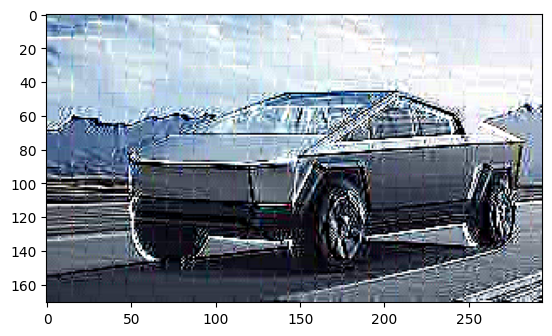

In [ ]:
#  기본적인 이미지 처리 기술을 이용한 이미지 선명도 처리

image = cv2.imread("/content/car.jpeg",1)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

filter = np.array([[1,1,-2],[-4,6,-5],[5,-1,-0]])

custom_filter_img = cv2.filter2D(image, -1,filter)

plt.imshow(custom_filter_img)
plt.show()




# 엠보스 효과 튀어나오게

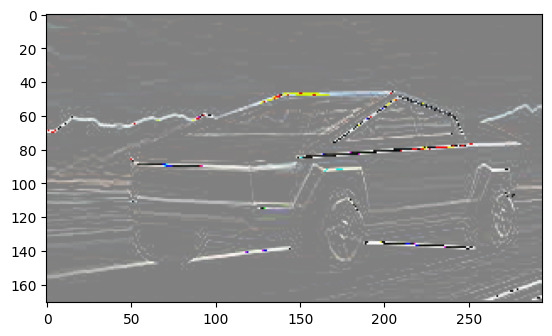

In [ ]:
image = cv2.imread("/content/car.jpeg",1)
#image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

filter = np.array([[0,1,0],[0,0,0],[0,-1,-0]])

emboss_img = cv2.filter2D(image, -1,filter)
emboss_img = emboss_img + 128

plt.imshow(emboss_img)
plt.show()


## 확장, 침식 실험 많이쓰임

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


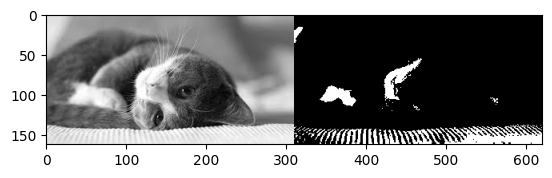

In [ ]:
image_path = "/content/cat (1).png"

image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE) # 항상 그레이스켈일로 된이미지만 확,침가능

_, maks = cv2.threshold(image, 230,255, cv2.THRESH_BINARY) # 230보다 큰값은 255로 (검정색) 그이하는 다 0 하얀색

image_list = np.hstack([
    image,
    maks
])

plt.imshow(image_list, 'gray')
plt.show()

# 확장 침식 실험 -01

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


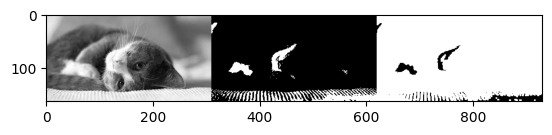

In [ ]:
image_path = "/content/cat (1).png"

image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE) # 항상 그레이스켈일로 된이미지만 확,침가능
_, mask = cv2.threshold(image, 230,255, cv2.THRESH_BINARY_INV) # 230보다 큰값은 255로 (검정색) 그이하는 다 0 하얀색
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel) # 침식 확장 반대

image_list = np.hstack([
    image,
    maks,
    dilation #
])

plt.imshow(image_list, 'gray')
plt.show()

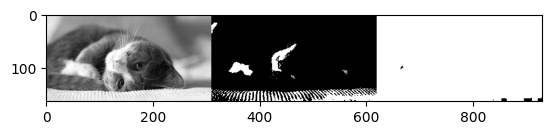

In [ ]:
image_path = "/content/cat (1).png"

image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE) # 항상 그레이스켈일로 된이미지만 확,침가능
_, mask = cv2.threshold(image, 230,255, cv2.THRESH_BINARY_INV) # 230보다 큰값은 255로 (검정색) 그이하는 다 0 하얀색
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel, iterations=5) # 침식 확장 반대

image_list = np.hstack([
    image,
    maks,
    dilation #
])

plt.imshow(image_list, 'gray')
plt.show()

## 차량 이미지 파일 읽기

In [2]:
#pip install pytesseract

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract # 이미지에서 텍스트 추출

720 960 3


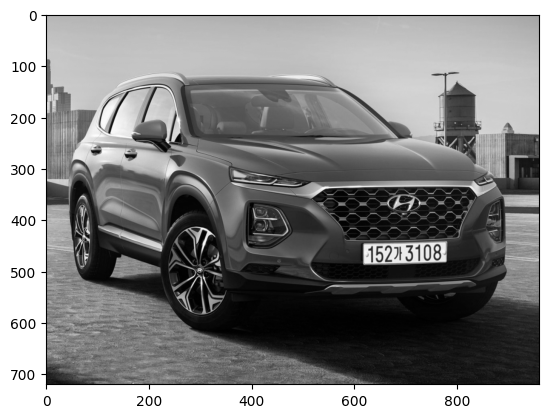

In [8]:
# text = pytesseract.image_to_string(image) 이런방식

image_path = "/content/car_license_plate.png"

image = cv2.imread(image_path,0)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#print(image) # 빈리스트가 나오면 경로오류가 대표적

h,w,c = image.shape
print(h,w,c)

plt.imshow(image,'gray')
plt.show()

# 차량 이미지 Grayscale변환

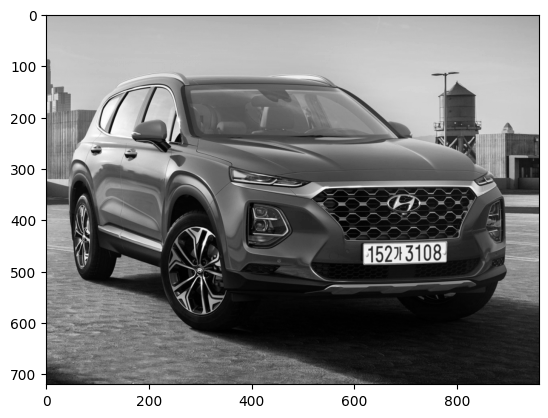

In [10]:
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY )

plt.imshow(gray_image,'gray') # 꼭 gray 명시 해줘야함 안해주면 안됨
plt.show()

# 3.차량 이미지 Maximizs contast

[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


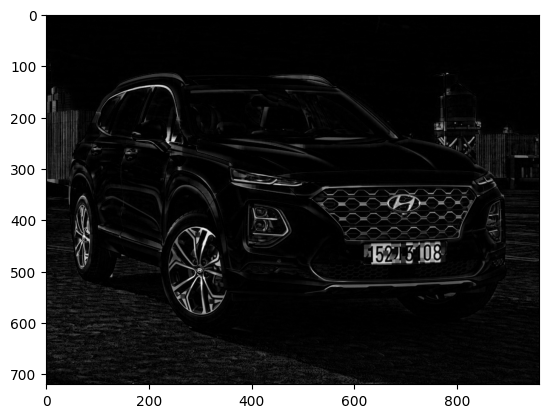

In [13]:
# 모폴로지 연산
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT ,(9,9))

print(structuringElement)

# TOPHAT -> 밝기 값이 크게 변화하는 영역을 강조
imgTopHat = cv2.morphologyEx(gray_image, cv2.MORPH_TOPHAT , structuringElement)

plt.imshow(imgTopHat,'gray')
plt.show()

## 차량 이미지 전처리 (바운딩 박스 표시)

In [ ]:
#temp_result = np.zeros((h,w,c), dtype=np.uint8)

contours_dict = []

for contour in contours :
  x,y,w,h = cv2.bondingRect(contour)
  cv2.rectangle(temp_result, (x,y), (x+w,y+h),)

